In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [6]:
print(mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
print(mnist.data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [8]:
import matplotlib.pyplot as plt 

%matplotlib inline

In [9]:
import numpy as np 

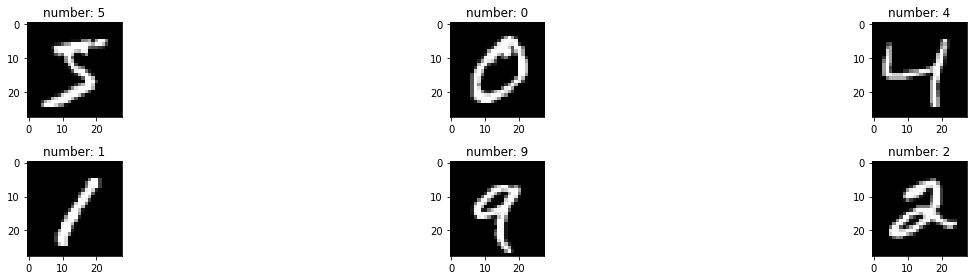

In [10]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(2,3,index+1)
    plt.tight_layout()
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("number: %s" %label)

In [11]:
from sklearn import metrics

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd = SGDClassifier(loss="hinge", penalty="l2",max_iter=5)

In [16]:
sgd.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5)

In [17]:
predictions = sgd.predict(X_test)
score = sgd.score(X_test, y_test)
print(score)

0.884


In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1275,    0,    2,   10,    1,   27,   16,    5,   23,    2],
       [   1, 1522,    3,    2,    2,   11,    0,    8,   17,    0],
       [   8,   23, 1133,   58,   10,   17,   16,   32,  141,   10],
       [   1,    9,   16, 1233,    1,   66,    7,   23,   52,   14],
       [   5,    2,   11,    6, 1172,   11,   13,   27,   39,   77],
       [   8,    5,    5,   54,    6, 1077,   12,   13,   59,   21],
       [   5,    7,    5,    2,    5,   42, 1291,    1,   14,    2],
       [   3,    5,   13,   11,   10,    4,    2, 1360,   12,   37],
       [   6,   12,    4,   32,    5,   94,    7,    8, 1146,   15],
       [  10,    4,    4,   25,   33,   24,    0,  132,   21, 1167]],
      dtype=int64)

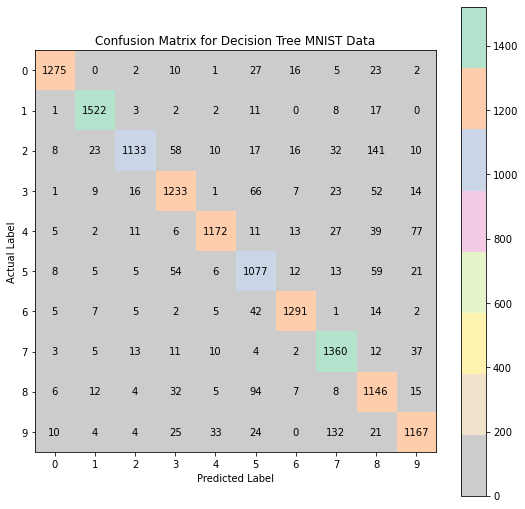

In [21]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel2_r')
plt.title('Confusion Matrix for Decision Tree MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')